# Trasforming an image of a comet
This code transforms an image, adds a scale bar, direction to the Sun, North (N), East (E), and the negative velocity vector of the comet projected onto the sky plane.

In [50]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib_scalebar.scalebar import ScaleBar
from astropy.io import fits
from astropy.visualization import ZScaleInterval
from astropy.visualization import ImageNormalize

In [51]:
hdulist = fits.open('2018DO4_0003.fit')
im = hdulist[0].data

In [52]:
obj_sub_size = 70
y_obj = 380
x_obj = 450
sub_obj = im[x_obj - obj_sub_size : x_obj + obj_sub_size, y_obj - obj_sub_size : y_obj + obj_sub_size]

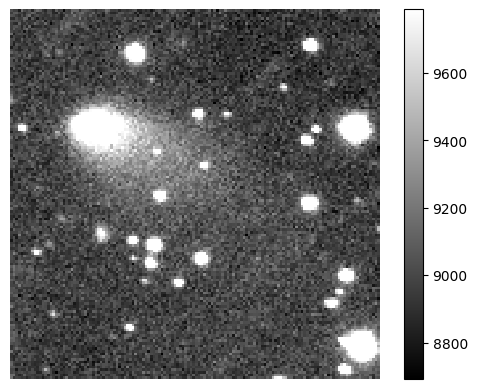

In [58]:
norm = ImageNormalize(sub_obj, interval=ZScaleInterval())
plt.imshow(sub_obj, cmap='gray', norm=norm, interpolation='none')
plt.gca().invert_yaxis()
plt.axis('off')
plt.colorbar()

In [54]:
fixed_coord_x, fixed_coord_y = 30, 31
r = 23

In [55]:
theta_north = 90 - 178
x_north = r*math.cos(theta_north*np.pi/180.0)
y_north = r*math.sin(theta_north*np.pi/180.0)

theta_east = 180 - 178
x_east = r*math.cos(theta_east*np.pi/180.0)
y_east = r*math.sin(theta_east*np.pi/180.0)

theta_sun = 268 + 90
x_sun = r*math.cos(theta_sun*np.pi/180.0)
y_sun = r*math.sin(theta_sun*np.pi/180.0)

theta_V = 66 + 90
x_V = r*math.cos(theta_V*np.pi/180.0)
y_V = r*math.sin(theta_V*np.pi/180.0)

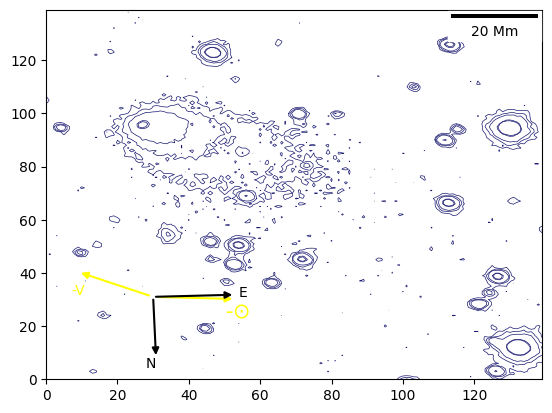

In [56]:
plt.annotate('', xy=(x_north+fixed_coord_x,y_north+fixed_coord_y), xytext=(fixed_coord_x,fixed_coord_y), arrowprops={'arrowstyle': '-|>', 'lw': 1.5, 'color': 'black'}, va='center')
plt.annotate('N', xy=(x_north+fixed_coord_x,y_north+fixed_coord_y), xytext=(28,4.5), color='black')

plt.annotate('', xy=(x_east+fixed_coord_x,y_east+fixed_coord_y), xytext=(fixed_coord_x,fixed_coord_y), arrowprops={'arrowstyle': '-|>', 'lw': 1.5, 'color': 'black'}, va='center')
plt.annotate('E', xy=(x_north+fixed_coord_x,y_north+fixed_coord_y), xytext=(54,31), color='black')

plt.annotate('', xy=(x_sun+fixed_coord_x,y_sun+fixed_coord_y), xytext=(fixed_coord_x,fixed_coord_y), arrowprops={'arrowstyle': '-|>', 'lw': 1.5, 'color': 'yellow'}, va='center',zorder=1)
plt.annotate('-$\odot$', xy=(x_north+fixed_coord_x,y_north+fixed_coord_y), xytext=(50,23), size=15, color='yellow')

plt.annotate('', xy=(x_V+fixed_coord_x,y_V+fixed_coord_y), xytext=(fixed_coord_x,fixed_coord_y), arrowprops={'arrowstyle': '-|>', 'lw': 1.5, 'color': 'yellow'}, va='center',zorder=1)
plt.annotate('-V', xy=(x_north+fixed_coord_x,y_north+fixed_coord_y), xytext=(7,32), color='yellow')

plt.plot(fixed_coord_x,fixed_coord_y, 'wo',markersize=5, zorder=2)

levels = [9200, 9500, 10000, 17000, 20000]
plt.contour(sub_obj, levels, colors='midnightblue', linewidths=0.5)

scalebar = ScaleBar(817,'km', dimension ='si-length') # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)

plt.show()